In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.8.0'

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
mnist.test.images.shape

(10000, 784)

In [9]:
mnist.validation.images.shape

(5000, 784)

In [11]:
mnist.train.images[0].shape

(784,)

In [13]:
mnist.train.images[0].reshape(28, 28).shape

(28, 28)

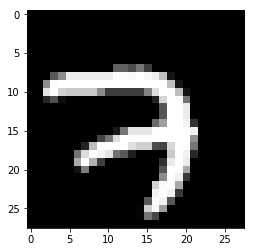

In [16]:
plt.imshow(mnist.train.images[0].reshape(28, 28), cmap="gray")

In [17]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


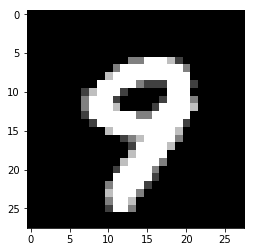

In [18]:
print(mnist.train.labels[999])
plt.imshow(mnist.train.images[999].reshape(28, 28), cmap="gray")

In [81]:
x = tf.placeholder(tf.float32, shape=[None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [82]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [83]:
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [84]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ - tf.log(y), reduction_indices=[1]))

In [85]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)

In [86]:
sess = tf.InteractiveSession()

C:\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [87]:
tf.global_variables_initializer().run()

In [88]:
for i in range(550):
    batch_x, batch_y = mnist.train.next_batch(100)
    #print(batch_x.shape, batch_y.shape)
    sess.run(train_step, feed_dict={x: batch_x, y_: batch_y})

In [89]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [90]:
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [91]:
acc

<tf.Tensor 'Mean_7:0' shape=() dtype=float32>

In [92]:
sess.run(acc, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.098

In [93]:
w_n = sess.run(W)

In [94]:
b_n = sess.run(b)

In [104]:
sess.run(tf.argmax([[0.001, 0.4, 93, 0.442, 6.2, 9.3, 3.0, 0.3],
                    [0.1, 0.0004, 0.35, 4.2, 4.2, 98, 0.003, 4.4]],axis=0))

array([1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [105]:
sess.run(tf.argmax([[0.001, 0.4, 93, 0.442, 6.2, 9.3, 3.0, 0.3],
                    [0.1, 0.0004, 0.35, 4.2, 4.2, 98, 0.003, 4.4]],axis=1))

array([2, 5], dtype=int64)

In [76]:
sess.close()